In [16]:
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter
import random

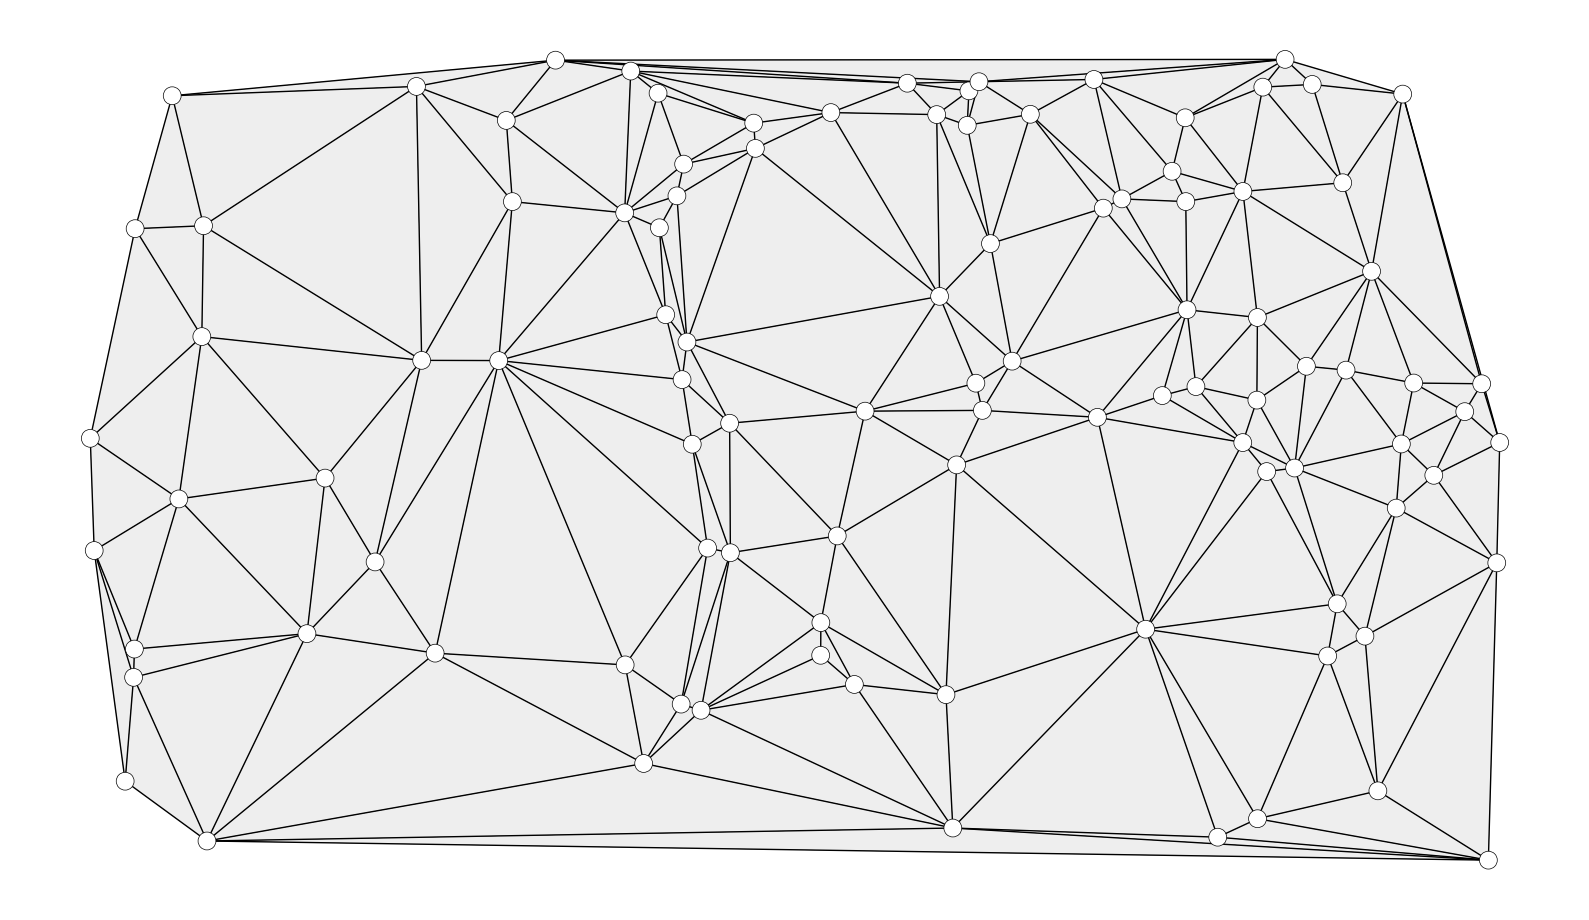

In [17]:
points = []

for i in range(100):
    x = random.random() * 16
    y = random.random() * 9
    z = 0

    points.append([x,y,z])
    
mesh0 = Mesh()

for p in points:
    mesh0.add_vertex(x=p[0], y=p[1], z=0.)
    

from compas.geometry import delaunay_from_points
faces = delaunay_from_points(points)

for f in faces:
    mesh0.add_face(f)
    
plotter = MeshPlotter(mesh0)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()





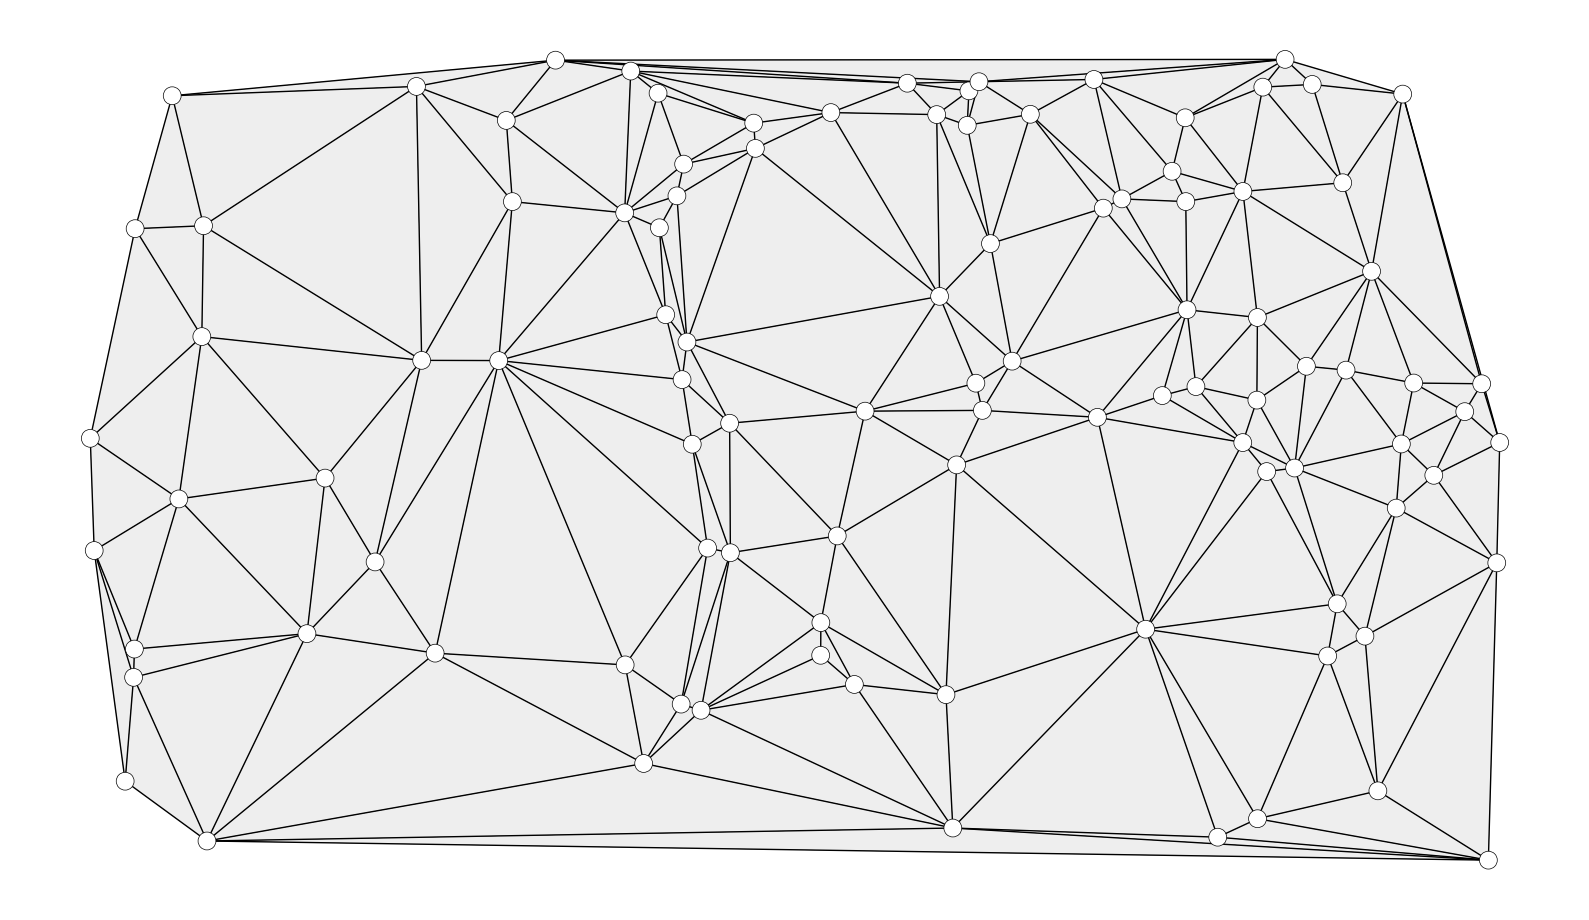

In [18]:
mesh1 = Mesh.from_vertices_and_faces(points, faces)

plotter = MeshPlotter(mesh1)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces()
plotter.show()


ValueError: RGBA values should be within 0-1 range

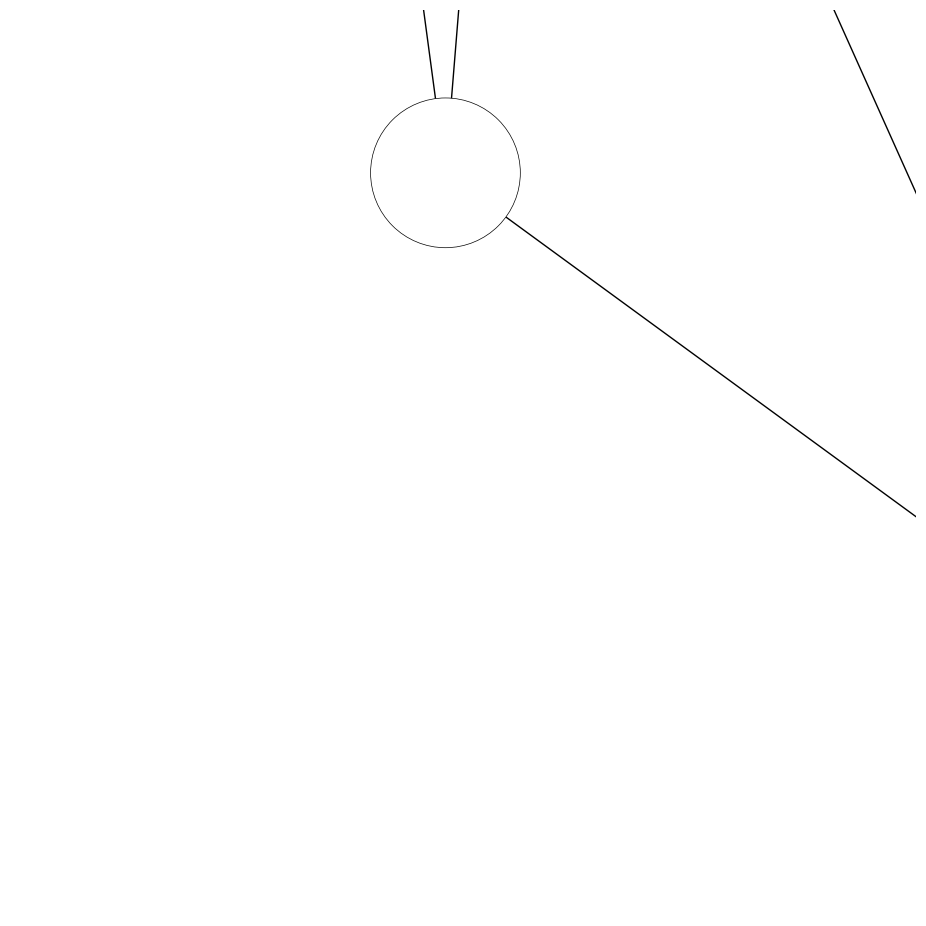

In [19]:
colordict = {}

for fkey in mesh1.faces():
    fa = mesh1.face_area(fkey)
    colordict[fkey] = [fa/3.5]*3
    
plotter = MeshPlotter(mesh1)
plotter.draw_edges()
plotter.draw_vertices()
plotter.draw_faces(
    facecolor = colordict
)
plotter.show()

In [29]:
colordict = {}

for fkey in mesh1.faces():
    fa = mesh1.face_area(fkey)
    colordict[fkey] = fa
    
area_max = max(colordict.values())
area_min = min(colordict.values())

for fkey in colordict:
    old_value = colordict[fkey]
    new_value = (old_value - area_min) / (area_max - area_min)
    colordict[fkey] = [new_value ] * 3
    

    

In [32]:
skewdict = {}

for fkey in mesh1.faces():
    fs = mesh1.face_skewness(fkey)
    skewdict[fkey] = fs 
    
skew_max = max(skewdict.values())
skew_min = min(skewdict.values())

print(skew_max)
print(skew_min)

for fkey in colordict:
    area_value = colordict[fkey] 
    skew_value = skewdict[fkey]
    colordict[fkey] = [area_value[0], skew_value, .5]

0.9949285734284598
0.046215271104295394


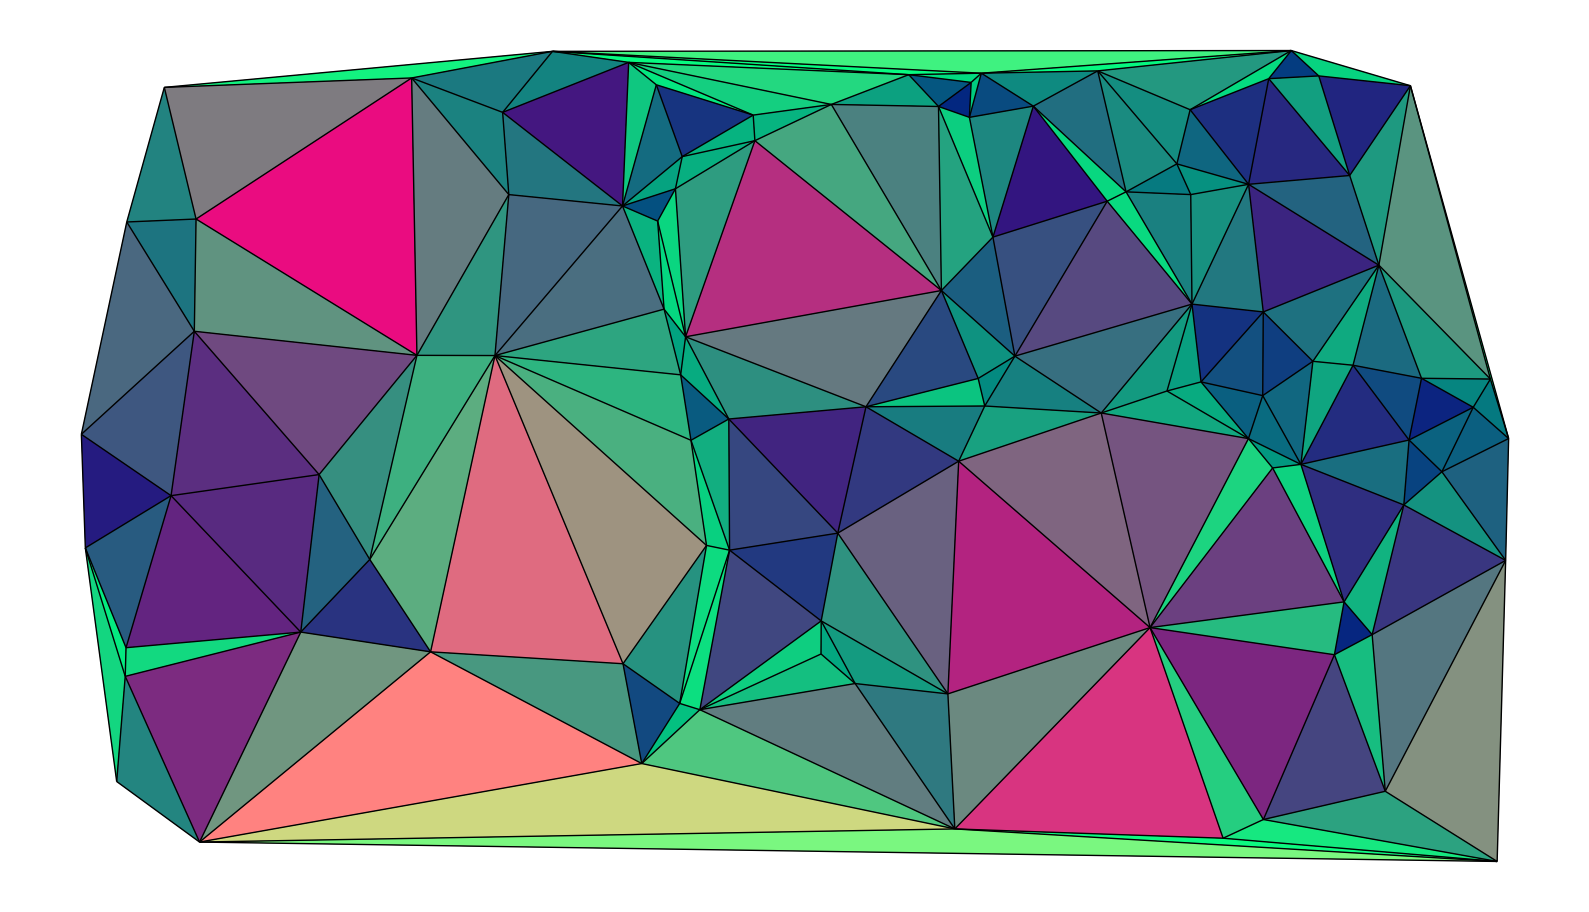

In [33]:
plotter = MeshPlotter(mesh1)
plotter.draw_edges()
#plotter.draw_vertices()
plotter.draw_faces(
    facecolor = colordict 
)
plotter.show()